In [1]:
import io
import os
import platform
import pdb

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib.pyplot import cm

import torch
import torch.nn as nn
import torch.optim as optim
from sklearn import preprocessing

In [4]:
data=pd.read_csv("./vancouver.csv")
data=data.iloc[:,2:]
data.replace(9999,np.nan,inplace=True)
data.replace(-999,np.nan,inplace=True)
for i in range(len(data)):
    for j in range(len(data.columns)):
        if np.isnan(data.iat[i,j]):
            if i==0:
                data.iloc[i,j]=data.iat[i+1,j]
            elif i==len(data)-1:
                data.iloc[i,j]=data.iat[i-1,j]
            else:
                data.iloc[i,j]=np.nanmean([data.iat[i-1,j],data.iat[i+1,j]])

In [5]:
# data.fillna(np.mean(data),inplace=True)

In [6]:
data.tail()

,TEMP_MEAN,SO2,O3,CO,HUMIDITY,NO2,NO,WDIR_SCLR,RAD_TOTAL,WSPD_VECT,WSPD_SCLR,ATM_PRESS_1HR,WDIR_VECT,PM25,PRECIP_TOTAL,PM10
17524,10.9,0.5,24.0,0.15,80.6,7.2,0.4,83.6,0.0,4.50,4.59,101.1,82.2,3.6,0.0,20.5
17525,10.8,0.4,23.8,0.13,82.0,7.3,0.5,90.4,11.6,6.83,7.17,101.1,91.1,3.2,0.0,20.5
17526,10.8,0.5,21.6,0.15,83.5,9.7,1.2,87.0,55.3,6.61,6.90,101.1,86.9,2.9,0.0,20.5
17527,11.4,0.6,17.3,0.18,83.0,14.8,6.2,81.8,113.8,4.77,5.05,101.2,81.7,3.5,0.0,20.5
17528,12.3,0.7,18.7,0.19,79.2,13.9,4.7,94.8,182.7,4.77,2.98,101.2,81.7,3.2,0.0,20.5


In [7]:
dataset=pd.DataFrame(data)
# dataset=pd.to_numeric(dataset, errors='coerce')
# train_data=dataset.head(14023)
# valid_data=dataset.drop(train_data.index)
scaler = preprocessing.MinMaxScaler() 
scaled_values = scaler.fit_transform(dataset) 
dataset.loc[:,:] = scaled_values

In [8]:
dataset.head()

,TEMP_MEAN,SO2,O3,CO,HUMIDITY,NO2,NO,WDIR_SCLR,RAD_TOTAL,WSPD_VECT,WSPD_SCLR,ATM_PRESS_1HR,WDIR_VECT,PM25,PRECIP_TOTAL,PM10
0,0.703390,0.040000,0.276090,0.119048,0.711165,0.217021,0.024607,0.854960,0.0,0.260220,0.246461,0.694915,0.855991,0.015744,0.0,0.077052
1,0.703390,0.040000,0.170410,0.101190,0.673544,0.154610,0.022215,0.856071,0.0,0.295497,0.284346,0.694915,0.858493,0.011927,0.0,0.054439
2,0.683616,0.053333,0.155878,0.101190,0.728155,0.188652,0.035885,0.858572,0.0,0.280764,0.267485,0.694915,0.857937,0.011927,0.0,0.064489
3,0.672316,0.026667,0.340819,0.077381,0.802184,0.097872,0.021873,0.823840,0.0,0.361486,0.349917,0.677966,0.824020,0.017176,0.0,0.087940
4,0.672316,0.033333,0.276750,0.086310,0.764563,0.132624,0.024778,0.838844,0.0,0.343847,0.334305,0.677966,0.838477,0.015267,0.0,0.057789


In [37]:
dataset.describe()

,TEMP_MEAN,SO2,O3,CO,HUMIDITY,NO2,NO,WDIR_SCLR,RAD_TOTAL,WSPD_VECT,WSPD_SCLR,ATM_PRESS_1HR,WDIR_VECT,PM25,PRECIP_TOTAL,PM10
count,17529.000000,17529.000000,17529.000000,17529.000000,17529.000000,17529.000000,17529.000000,17529.000000,17529.000000,17529.000000,17529.000000,17529.000000,17529.000000,17529.000000,17529.000000,17529.000000
mean,0.499376,0.046503,0.232901,0.136000,0.735456,0.210659,0.037946,0.443150,0.144726,0.197256,0.190684,0.590422,0.445388,0.026611,0.008662,0.086854
std,0.180636,0.057319,0.153812,0.083462,0.171515,0.143608,0.071788,0.251656,0.236669,0.116288,0.115175,0.133083,0.250088,0.026061,0.033413,0.061144
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.370056,0.013333,0.096433,0.083333,0.621359,0.095035,0.005810,0.251737,0.000000,0.114547,0.106370,0.525424,0.253267,0.011927,0.000000,0.051089
50%,0.494350,0.026667,0.231176,0.113095,0.757282,0.175887,0.012645,0.338427,0.005836,0.178253,0.170275,0.593220,0.342508,0.020038,0.000000,0.072864
75%,0.638418,0.066667,0.350066,0.154762,0.873786,0.302128,0.034176,0.716310,0.197203,0.259597,0.252082,0.677966,0.718376,0.032443,0.000000,0.103853
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
data_set=np.asarray(dataset,dtype=np.float32)

In [10]:
seq_len = 30 + 1
x=len(data_set)-seq_len
sequences = [data_set[t:t+seq_len] for t in range(x)]

In [11]:
len(sequences)

17498

In [12]:
seq=torch.FloatTensor(sequences)

In [13]:
seq.shape

torch.Size([17498, 31, 16])

In [14]:
split_row=round(0.90*seq.size(0))
x_train_set=seq[:split_row, :-1]
y_train_set=seq[:split_row, -1]
x_valid_set=seq[split_row:, :-1]
y_valid_set=seq[split_row:, -1]

In [15]:
print(x_train_set.shape)
print(y_train_set.shape)
print(x_valid_set.shape)
print(y_valid_set.shape)

torch.Size([15748, 30, 16])
torch.Size([15748, 16])
torch.Size([1750, 30, 16])
torch.Size([1750, 16])


In [26]:
class LSTM(nn.Module):
    def __init__(self,input_size,hidden_size,num_layers=1,dropout=0,bidirectional=False):
        super(LSTM,self).__init__()
        self.input_size=input_size
        self.hidden_size=hidden_size
        self.num_layers=num_layers
        self.dropout=dropout
        self.bidirectional=bidirectional
        self.lstm = nn.LSTM(input_size,
                            hidden_size,
                            num_layers,
                            dropout=dropout,
                            bidirectional=bidirectional)
        self.linear = nn.Linear(hidden_size, 16)
        
    def forward(self,inputs,hidden):
        outputs,hidden=self.lstm(inputs,hidden)
        predictions=self.linear(outputs[-1])
        return predictions,outputs,hidden
    
    def init_hidden(self,batch_size):
        num_directions=2 if self.bidirectional else 1
        hidden = (torch.zeros(self.num_layers*num_directions, batch_size, self.hidden_size),
                  torch.zeros(self.num_layers*num_directions, batch_size, self.hidden_size))
        return hidden

In [27]:
def get_batch(x,y,i,batch_size):
    if x.dim() == 2:
        x = x.unsqueeze(2)
    batch_x = x[(i*batch_size):(i*batch_size)+batch_size, :, :]
    batch_y = y[(i*batch_size):(i*batch_size)+batch_size]

    # Reshape Tensors into (seq_len, batch_size, input_size) format for the LSTM.
    batch_x = batch_x.transpose(0, 1)
    
    return batch_x, batch_y

In [28]:
def train(model,x_train_set,y_train_set,optimizer,batch_size,epoch):
    num_sequences=x_train_set.size(0)
    num_batches=num_sequences//batch_size
    
    total_loss=0
    
    model.train()
    for i in range(num_batches):
        # Get input and target batches and reshape for LSTM.
        batch_x, batch_y = get_batch(x_train_set, y_train_set, i, batch_size)

        # Reset the gradient.
        lstm.zero_grad()
        
        # Initialize the hidden states (see the function lstm.init_hidden(batch_size)).
        hidden = lstm.init_hidden(batch_size)
        
        # Complete a forward pass.
        y_pred, outputs, hidden = lstm(batch_x,hidden)
        
        # Calculate the loss with the 'loss_fn'.
        loss = loss_fn(y_pred,batch_y)
        
        # Compute the gradient.
        loss.backward()
        
        # Clip to the gradient to avoid exploding gradient.
        nn.utils.clip_grad_norm_(lstm.parameters(), max_grad_norm)

        # Make one step with optimizer.
        optimizer.step()
        
        # Accumulate the total loss.
        total_loss += loss.data
        
    print("Epoch {}: Loss = {:.8f}".format(epoch+1, total_loss/num_batches))
    return total_loss/num_batches

In [29]:
def eval(model,x_valid_set,y_valid_set,optimizer,batch_size):
    num_sequences=x_valid_set.size(0)
    num_batches=num_sequences//batch_size
    
    total_loss=0
    
    model.eval()
    for i in range(num_batches):
        # Get input and target batches and reshape for LSTM.
        batch_x, batch_y = get_batch(x_valid_set, y_valid_set, i, batch_size)

        # Reset the gradient.
        lstm.zero_grad()
        
        # Initialize the hidden states (see the function lstm.init_hidden(batch_size)).
        hidden = lstm.init_hidden(batch_size)
        
        # Complete a forward pass.
        y_pred, outputs, hidden = lstm(batch_x,hidden)
        
        # Calculate the loss with the 'loss_fn'.
        loss = loss_fn(y_pred,batch_y)
        
        # Compute the gradient.
        loss.backward()
        
        # Clip to the gradient to avoid exploding gradient.
        nn.utils.clip_grad_norm_(lstm.parameters(), max_grad_norm)

        # Make one step with optimizer.
        optimizer.step()
        
        # Accumulate the total loss.
        total_loss += loss.data

    print("Validation: Loss = {:.8f}".format(total_loss/num_batches))
    return total_loss/num_batches

In [30]:
def save_model(epoch, model, path='./'):
    
    # file name and path 
    filename = path + 'neural_network_{}.pt'.format(epoch)
    
    # load the model parameters 
    torch.save(model.state_dict(), filename)
    
    
    return model

In [31]:
def load_model(epoch, model, path='./'):
    
    # file name and path 
    filename = path + 'neural_network_{}.pt'.format(epoch)
    
    # load the model parameters 
    model.load_state_dict(torch.load(filename))
    
    
    return model

Training model for 30 epoch
Epoch 1: Loss = 0.01484141
Validation: Loss = 0.00789493
Epoch 2: Loss = 0.00700880
Validation: Loss = 0.00530497
Epoch 3: Loss = 0.00564360
Validation: Loss = 0.00444775
Epoch 4: Loss = 0.00510346
Validation: Loss = 0.00415383
Epoch 5: Loss = 0.00484353
Validation: Loss = 0.00399788
Epoch 6: Loss = 0.00467219
Validation: Loss = 0.00389013
Epoch 7: Loss = 0.00454534
Validation: Loss = 0.00380038
Epoch 8: Loss = 0.00443540
Validation: Loss = 0.00372008
Epoch 9: Loss = 0.00433571
Validation: Loss = 0.00364931
Epoch 10: Loss = 0.00424476
Validation: Loss = 0.00358668
Epoch 11: Loss = 0.00416427
Validation: Loss = 0.00352940
Epoch 12: Loss = 0.00409846
Validation: Loss = 0.00348106
Epoch 13: Loss = 0.00404632
Validation: Loss = 0.00344297
Epoch 14: Loss = 0.00400372
Validation: Loss = 0.00341226
Epoch 15: Loss = 0.00396789
Validation: Loss = 0.00338665
Epoch 16: Loss = 0.00393721
Validation: Loss = 0.00336481
Epoch 17: Loss = 0.00391054
Validation: Loss = 0.0033

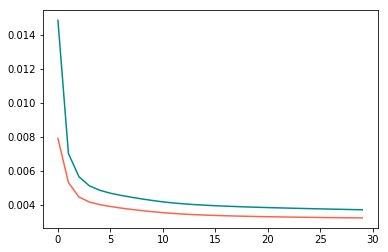

In [32]:
input_size=16
hidden_size=24
num_layers=2
lstm=LSTM(input_size,hidden_size,num_layers)

learning_rate=0.001
max_grad_norm=5
loss_fn = nn.MSELoss()
optimizer = optim.Adam(lstm.parameters(), lr=learning_rate)

batch_size = 8
num_epochs = 30 #3
# num_sequences = x_train_set.size(0)
# num_batches = num_sequences //batch_size

checkpoint_freq = 10
path = './'

train_losses=[]
valid_losses=[]

print("Training model for {} epoch".format(num_epochs))
for epoch in range(num_epochs):
    total_loss = 0

    # Shuffle input and target sequences.
    idx = torch.randperm(x_train_set.size(0))
    x = x_train_set[idx]
    y = y_train_set[idx]

    train_loss=train(lstm,x_train_set,y_train_set,optimizer,batch_size,epoch)
    valid_loss=eval(lstm,x_valid_set,y_valid_set,optimizer,batch_size)
    
    train_losses.append(train_loss)
    valid_losses.append(valid_loss)
    
    # Checkpoint
    if epoch % checkpoint_freq ==0:
        save_model(epoch, lstm, path)
        
# Last checkpoint
save_model(num_epochs, lstm, path)
    
print("\n\n\nOptimization ended.\n")

plt.plot(train_losses, color="darkcyan", label="train")
plt.plot(valid_losses, color="tomato",label="validation")
plt.show()

In [45]:
def predict_one_hour(model,x_valid_set,input_size,num_steps):
    predictions=torch.zeros(num_steps)
    for i, x in enumerate(x_valid_set):
        hidden=model.init_hidden(1)
        y_pred,_,_=model(x.contiguous().view(-1, 1, input_size),hidden)
        predictions[i]=y_pred[:,-3]
    return predictions

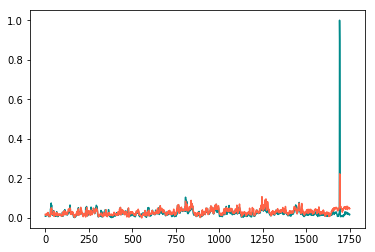

In [47]:
one_step_predictions = predict_one_hour(lstm, x_valid_set, input_size, y_valid_set.size(0))
plt.plot(y_valid_set[:,-3].data.numpy(),color='darkcyan')
plt.plot(one_step_predictions.data.numpy(),color='tomato')
plt.show()